In [1]:
#importing necessary libraries
import matplotlib
import matplotlib.pyplot as plt
import subprocess
from Bio import AlignIO
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Align import MultipleSeqAlignment
from Bio.Phylo.TreeConstruction import DistanceMatrix
from pymsaviz import MsaViz, get_msa_testdata
from ete3 import Tree, TreeStyle, NodeStyle

In [2]:
#reading the alignment file that resulted from maffta analysis using terminal
alignment = AlignIO.read('Viruses_sample_alignment_sirtuins', 'fasta')
print(alignment)

Alignment with 54 rows and 335 columns
--------------MFFILGAGASKDSGLPTYR----GNGGIYN...--- YP_009448223_1|Sir2_CobB_Viruses_Orpheovirus_IHUMI-LCC2
------------MSIFFILGAGASVDSGLYTYR----GDNSRNE...--- ATZ81038_1|Sir2_CobB_Viruses_Bodo_saltans_virus
-----------MRRLIIISGAGLSVESGVRAFRTDTASGKALWD...CP- YP_009784931_1|Sir2_CobB_Viruses_Escherichia_phage_DT571_2
-----------MRRLIIISGAGLSVESGVRAFRTDTASGKALWD...CP- YP_009843423_1|H_Sir2_CobB_Viruses_HWC04_gp132_Escherichia_phage_vB_EcoS_HdH2
-----------MRRLIIISGAGLSVESGVRAFRTDTASGKALWD...CP- YP_009857807_1|Sir2_CobB_Viruses_Salmonella_phage_oldekolle
-----------MRRLIIISGAGLSVESGVRAFRTDTASGKALWD...--- YP_009849782_1|Sir2_CobB_Viruses_Salmonella_phage_Th1
-----------MRRLIIISGAGLSVESGVRAFRTDTASGKALWD...--- YP_009829750_1|Sir2_CobB_Viruses_Escherichia_phage_SP15
-----------MRRLIIISGAGLSVESGVRAFRTDTASGKALWD...CP- YP_009790975_1|Sir2_CobB_Viruses_Escherichia_phage_OSYSP
-----------MRRLIIISGAGLSVESGVRAFRTDTASGKALWD...CP- YP_009857236_1|Sir2_CobB_Viruses_P

In [3]:
#checking the alignment type
print(type(alignment))

<class 'Bio.Align.MultipleSeqAlignment'>


In [4]:
#calculating the distance matrix using Tree Calculator
calculator = DistanceCalculator('identity')
distMatrix = calculator.get_distance(alignment)

In [5]:
#constructing Neighbour-joining tree
constructor = DistanceTreeConstructor()
tree = constructor.nj(distMatrix) 
Phylo.draw_ascii(tree)

 , YP_009857236_1|Sir2_CobB_Viruses_Phag...
 |
 , YP_009857807_1|Sir2_CobB_Viruses_Salm...
 |
 , AAU05239_1|Sir2_CobB_Viruses_Escheric...
 |
 | YP_009829750_1|Sir2_CobB_Viruses_Esch...
 |
 , YP_009849782_1|Sir2_CobB_Viruses_Salm...
 |
 |, YP_006382404_1|Sir2_CobB_Viruses_Esch...
 ||
 || __ YP_009857956_1|Sir2_CobB_Viruses_Salm...
 |||
 |||            , YP_007006248_1|Sir2_CobB_Viruses_Esch...
 |||     _______|
 |||    |       | , YP_002003582_1|Sir2_CobB_Viruses_Esch...
 |||    |       |_|
 |||    |         , QHR68830_1|Sir2_CobB_Viruses_Escheric...
 |||    |         |
 |||    |         , QHR69256_1|Sir2_CobB_Viruses_Escheric...
 |||    |         |
 | |    |         , QHR71134_1|Sir2_CobB_Viruses_Escheric...
 | |    |         |
 | |    |         , QHR73233_1|Sir2_CobB_Viruses_Escheric...
 | |    |         |
 | |    |         , QHR73371_1|Sir2_CobB_Viruses_Escheric...
 | |    |         |
 | |    |         , QHR76368_1|Sir2_CobB_Viruses_Escheric...
 | |    |         |
 | |____|         |

In [6]:
#constructing UPGMA tree
constructor = DistanceTreeConstructor()
tree = constructor.upgma(distMatrix)
Phylo.draw_ascii(tree)


         _________ YP_009102063_1|Sir2_CobB_Viruses_Esch...
      __|
     |  |      ___ YP_006987223_1|Sir2_CobB_Viruses_Cron...
     |  |_____|
     |        |___ YP_009594660_1|Sir2_CobB_Viruses_Pect...
     |
     |                _ NP_899291_1|Sir2_CobB_Viruses_Vibrio_...
     |     __________|
     |    |          | , ALP47040_1|Sir2_CobB_Viruses_Vibrio_p...
     |    |          |_|
     |    |            | ALP47418_1|Sir2_CobB_Viruses_Vibrio_p...
     |    |
     |    |                  , YP_009858285_1|Sir2_CobB_Viruses_Salm...
  ___|    |                  |
 |   |    |            ______|, YP_009858447_1|Sir2_CobB_Viruses_Salm...
 |   |    |           |      ||
 |   |    |           |      |, YP_009858612_1|Sir2_CobB_Viruses_Salm...
 |   |    |           |       |
 |   |    |           |       , YP_009816766_1|Sir2_CobB_Viruses_Salm...
 |   |    |           |       |
 |   |    |           |       | YP_009858121_1|Sir2_CobB_Viruses_Salm...
 |   |    |           |       |
 |   | 

In [7]:
#saving tree as nexus file
Phylo.write(tree, "tree.nex", "nexus")

1

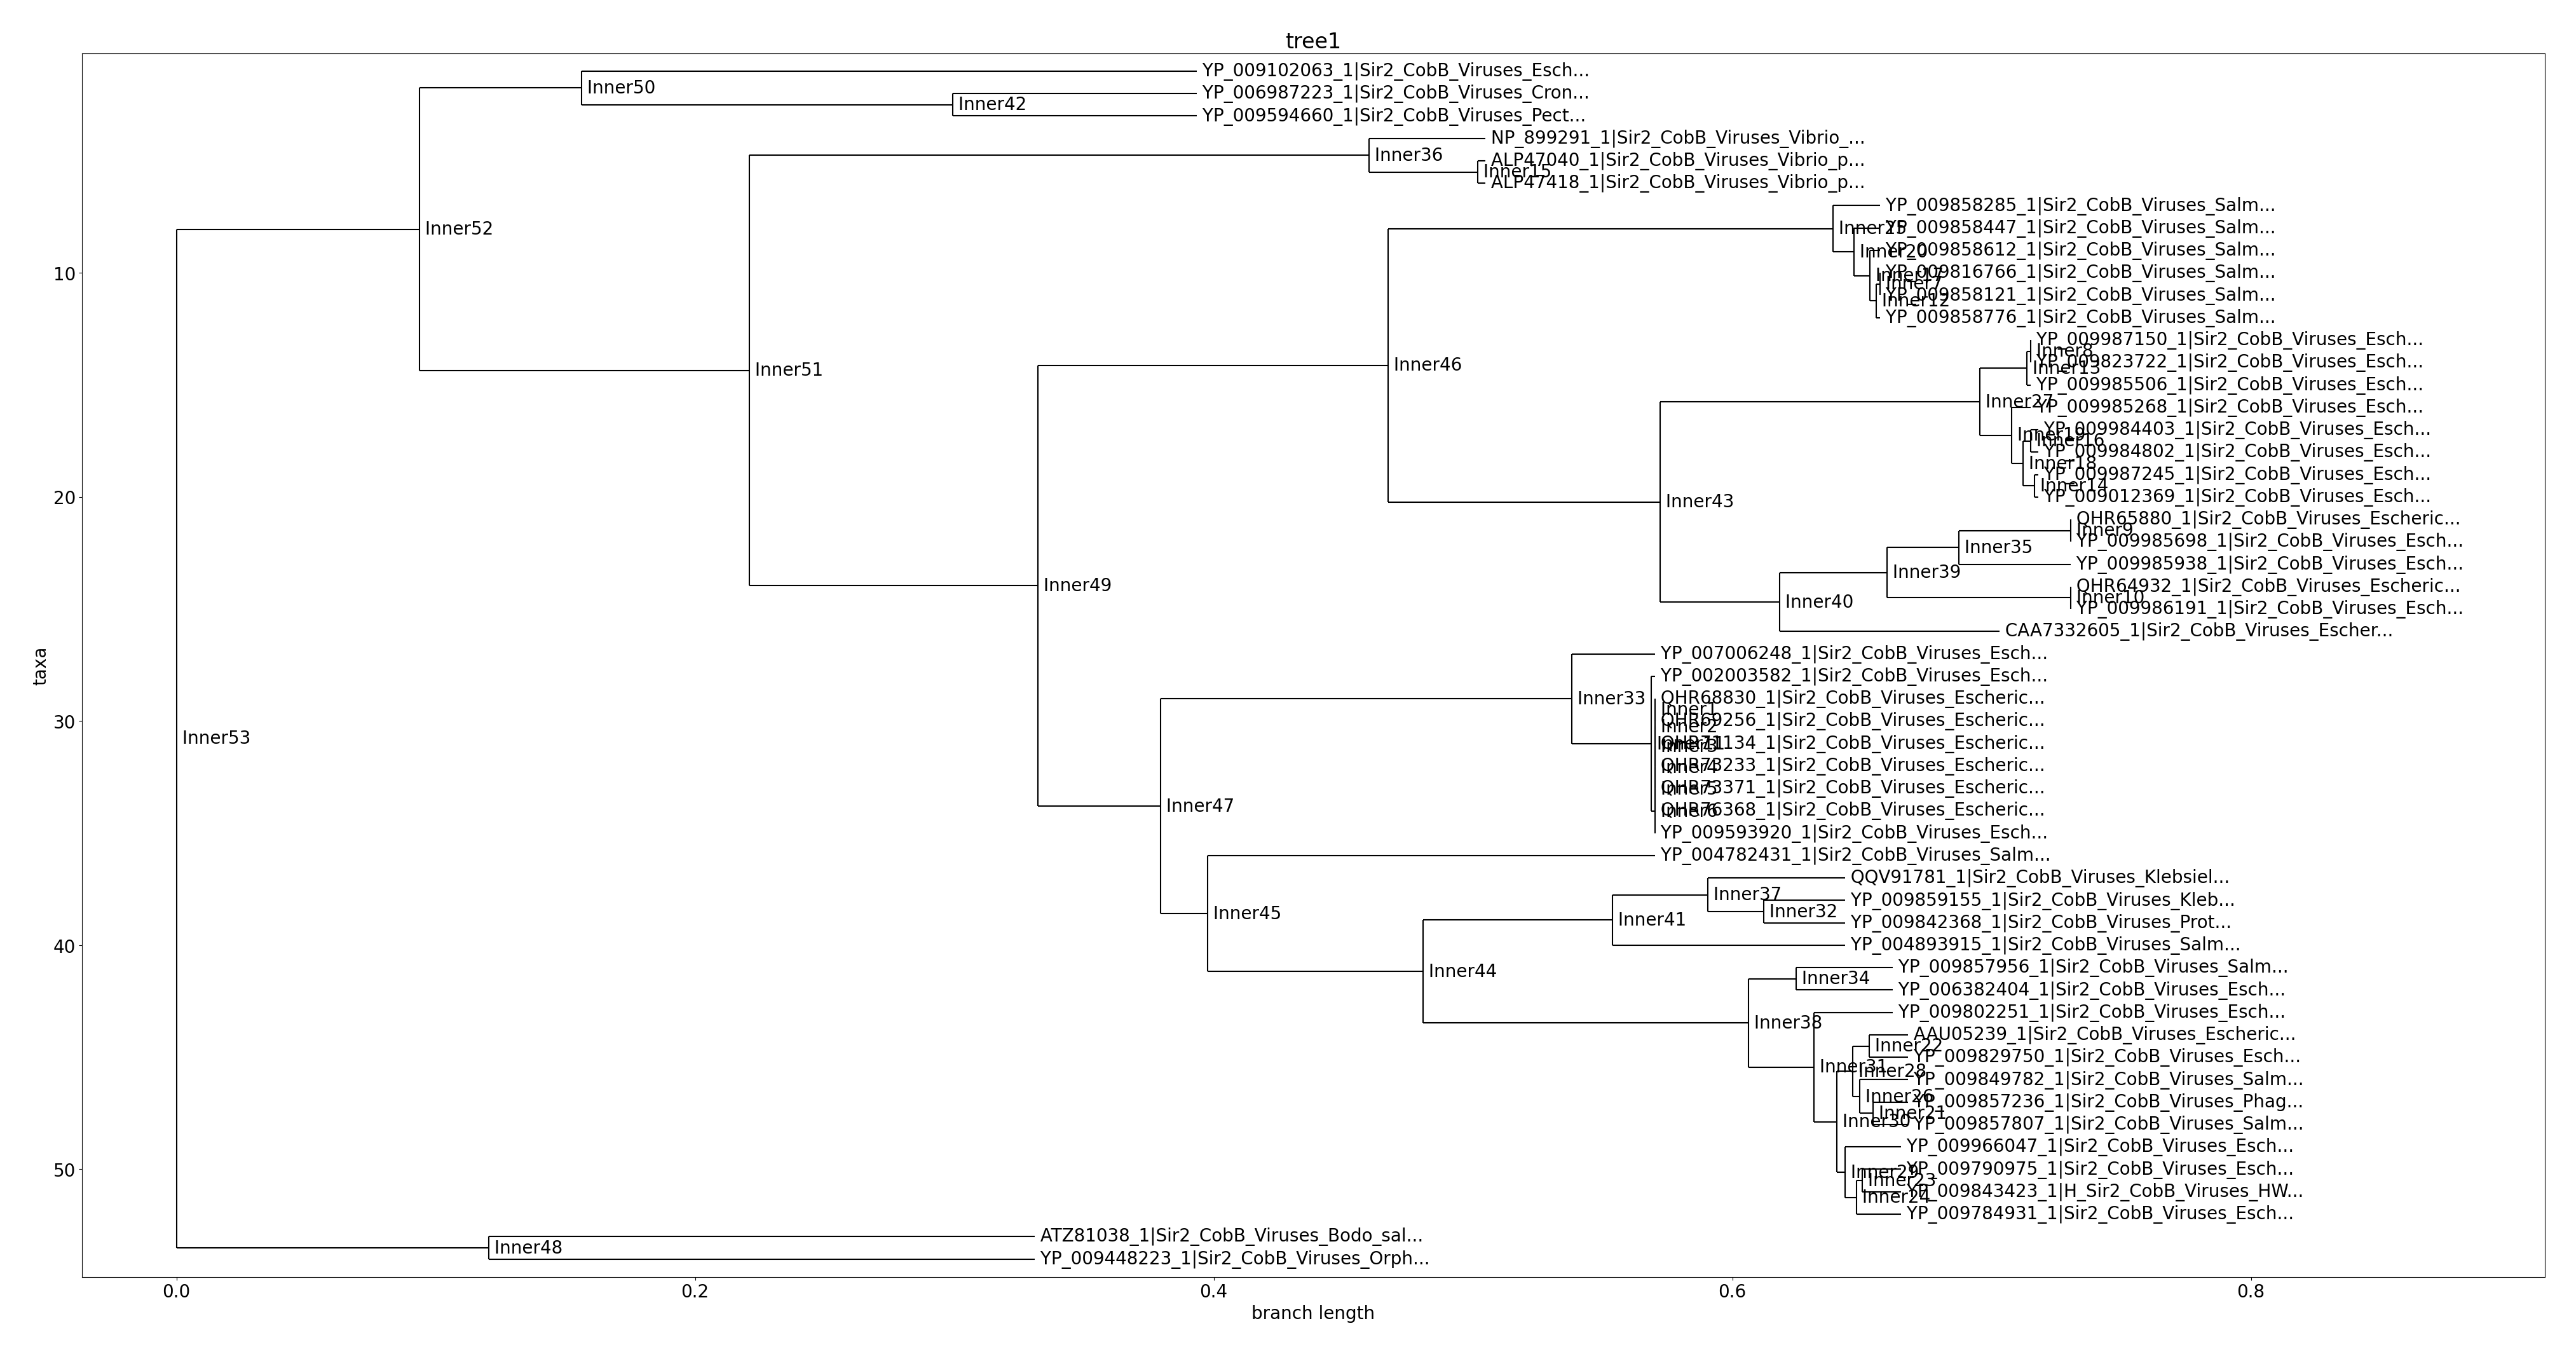

In [8]:
#creating a cladogram figure and saving it

#'inner..' clades labels have to be modified manually

tree_nex = Phylo.read("tree.nex", "nexus")

fig = plt.figure(figsize=(50, 25), dpi=100) #creating the figure and setting the size
matplotlib.rc('font', size=20) #fontsize of leaf and node labels
matplotlib.rc('xtick', labelsize=20) #fontsize of tick labels
matplotlib.rc('ytick', labelsize=20) #fontsize of tick labels
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(tree_nex, axes=axes)
fig.savefig("virus_cladogram")

In [9]:
#constructing a radial tree and coloring the nodes

def build_tree(fname: str):
    tree = Phylo.read(fname, 'nexus')
    return tree

if __name__ == '__main__':
    tree = build_tree('tree.nex')

def build_tree_for_ete3(clade):
    # converting the biopython tree to an ete3 tree
    built_tree = Tree()
    for child in clade.clades:
        child_tree = build_tree_for_ete3(child)
        built_tree.add_child(child=child_tree, name=child.name, dist=child.branch_length)
    return built_tree

built_tree = build_tree_for_ete3(tree.root)

ts = TreeStyle()
ts.show_leaf_name = True
ts.mode = "c"
ts.arc_start = -90
ts.arc_span = 360
ts.show_leaf_name = True
built_tree.show(tree_style=ts)
def get_node_color(node):
        if node.is_leaf():
            return "blue"
        else:
            return "green"


In [10]:
#saving the tree as .png file
image_file_path = '/Users/athenamarounka/Downloads/viruses_radial_tree_colored.png'
built_tree.render(image_file_path, tree_style=ts)

print(f"Radial tree saved as {image_file_path}")

Radial tree saved as /Users/athenamarounka/Downloads/viruses_radial_tree_colored.png


In [11]:
#creating a multiple sequence alignment figure 
msa_file = ('Viruses_sample_alignment_sirtuins')
vizual = MsaViz(msa_file, wrap_length=60, show_count=True)
vizual.savefig("/Users/athenamarounka/Downloads/Viruses_example02.png")
print(vizual)